In [1]:
import warnings
warnings.filterwarnings('ignore') # 'always'
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('default')
import seaborn as sns

# 데이터로딩

In [2]:
df = pd.read_csv('202112_DigitalPlatform_Score_KK.txt', sep='\t')
df.columns = ['Class', 'Name', 'Name_ENG', 'Identity', 'Division', 'Department', 'E-mail', 
              'Mid-term', 'Mid-term(100)', 
              'Task(InputOutput)', 'Task(InputVariable)', 'Task(ConditionLoop)', 'Task(Function)', 
              'Tast(InputNumpy)', 'Tast(InputDataFrame)',
              'w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6',
              'Mid&Final']
df_dict = dict()
for num in df.Class.unique():
    df_dict[num] = df[df.Class == num]

# 각 반별 중간고사 점수분포 비교

- 1: 1반,  2: 2반,  3: 3반
- 평균값 기준 1반 > 3반 > 2반 순으로 성적 높아
- 반면 최고점은 2반에서 299점 달성
- 고득점자 비율은 아래 히스토그램 상 2반>3반>1반 순으로 높음

In [3]:
df.groupby(['Class'])['Mid-term'].describe().T

Class,1,2,3
count,34.000000,35.000000,34.000000
mean,262.000000,254.428571,258.088235
std,18.563568,52.550976,22.415319
min,217.000000,0.000000,188.000000
25%,256.250000,254.000000,246.750000
50%,262.500000,263.000000,263.000000
75%,275.500000,283.500000,273.750000
max,296.000000,299.000000,291.000000


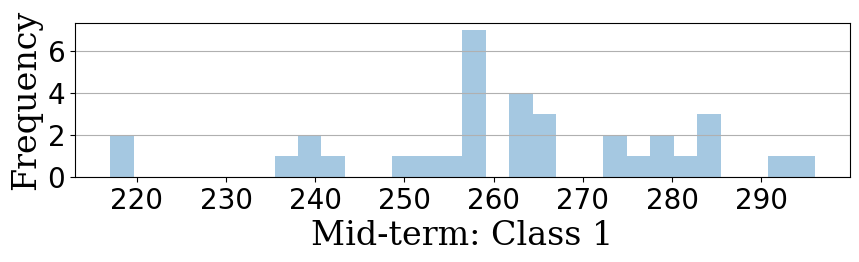

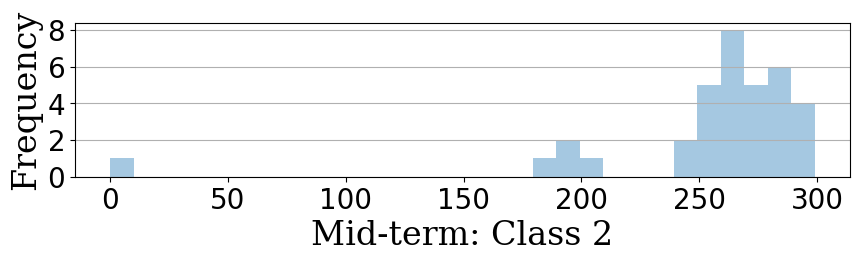

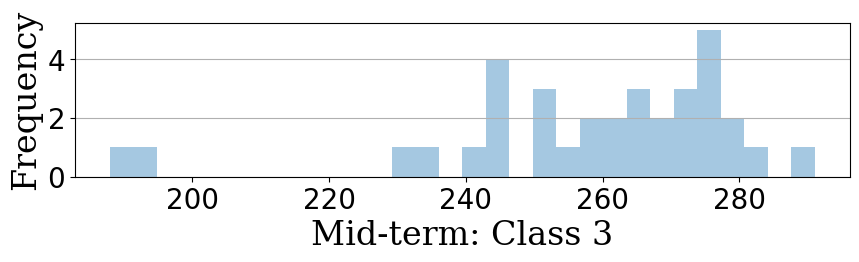

In [4]:
target = 'Mid-term'
fontsize = 20

for key in df_dict.keys():
    rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[key][target], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(target+': Class '+str(key), fontname='serif', fontsize=fontsize+4)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

# 각 반별 과제 점수분포 현황

- 중간고사 점수가 높은 학생들이 과제 점수도 높은 경향 (43% ~ 53% 상관성)
- 중간고사 보다도 과제들의 상관성이 훨씬 높음
    - 과제점수가 높은 학생들은 지속적으로 높고 낮은 학생들은 지속적으로 낮은 경향 (63% ~ 83% 상관성)
- 각 반별 과제점수 분포 차이는 적은편

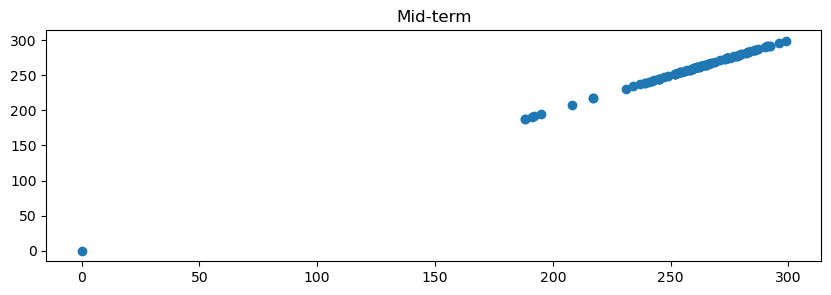

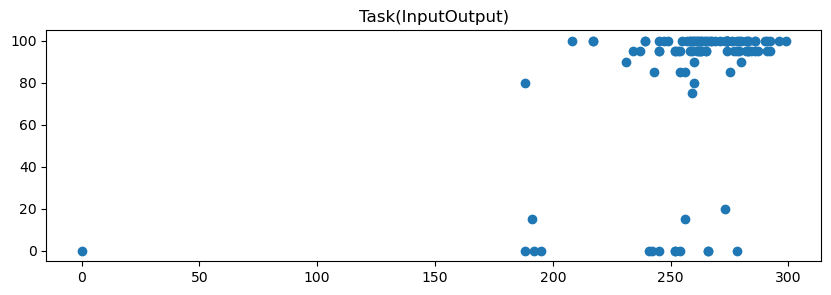

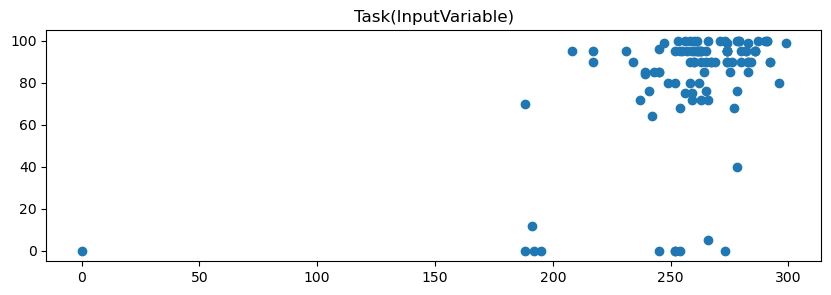

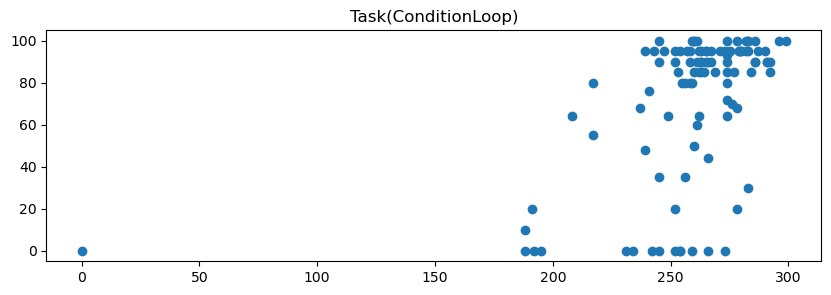

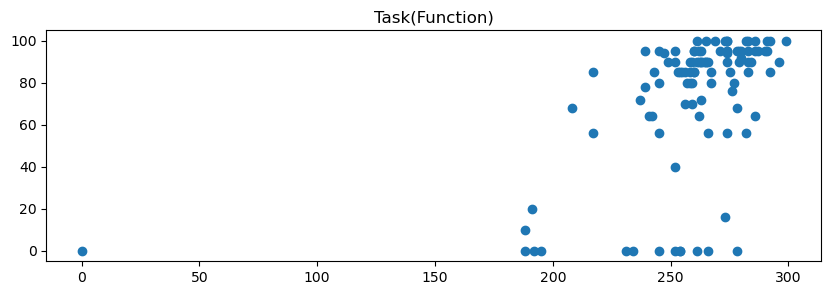

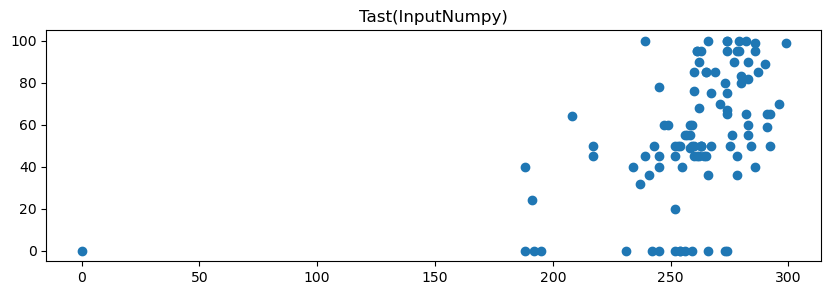

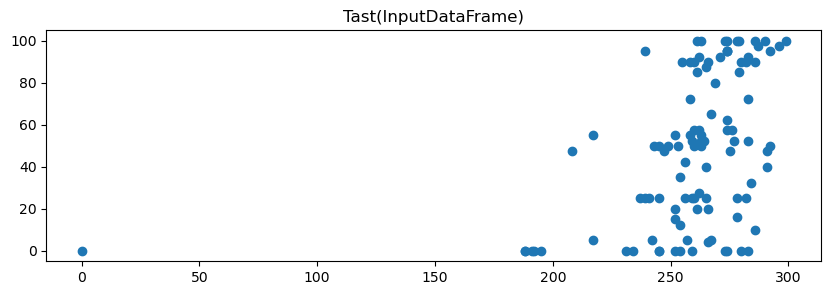

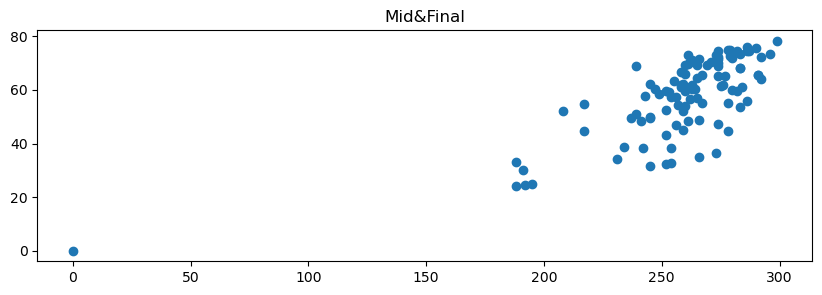

In [5]:
# X축: 중간고사, Y축: 각 과제
rcParams['figure.figsize'] = 10,3
for col in df.iloc[:,[7,9,10,11,12,13,14,-1]].columns:
    plt.scatter(df['Mid-term'], df[col])
    plt.title(col)
    plt.show()

In [6]:
df.iloc[:,[7,9,10,11,12,13,14,-1]].corr()

,Mid-term,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Tast(InputDataFrame),Mid&Final
Mid-term,1.000000,0.438239,0.494562,0.504893,0.518678,0.459657,0.419393,0.727482
Task(InputOutput),0.438239,1.000000,0.779195,0.720999,0.703574,0.639006,0.528060,0.725221
Task(InputVariable),0.494562,0.779195,1.000000,0.711710,0.725313,0.656875,0.554159,0.759599
Task(ConditionLoop),0.504893,0.720999,0.711710,1.000000,0.875507,0.779313,0.670046,0.862760
Task(Function),0.518678,0.703574,0.725313,0.875507,1.000000,0.757711,0.704685,0.878197
Tast(InputNumpy),0.459657,0.639006,0.656875,0.779313,0.757711,1.000000,0.794036,0.882502
Tast(InputDataFrame),0.419393,0.528060,0.554159,0.670046,0.704685,0.794036,1.000000,0.859725
Mid&Final,0.727482,0.725221,0.759599,0.862760,0.878197,0.882502,0.859725,1.000000


In [7]:
for key in df_dict.keys():
    print('Class '+str(key))
    display(df_dict[key].iloc[:,9:15].describe())

Class 1


,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Tast(InputDataFrame)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,93.529412,83.735294,78.970588,83.411765,57.794118,49.235294
std,17.430790,22.108971,27.171158,17.814052,25.586193,33.848422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,81.000000,72.500000,80.000000,50.000000,25.000000
50%,100.000000,90.000000,90.000000,90.000000,55.000000,52.500000
75%,100.000000,95.000000,95.000000,95.000000,73.750000,85.625000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Class 2


,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Tast(InputDataFrame)
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,81.000000,79.200000,71.485714,69.514286,53.514286,50.928571
std,36.557771,32.905211,33.886811,35.832430,32.525439,37.111149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,78.000000,64.000000,64.000000,38.000000,22.500000
50%,100.000000,95.000000,85.000000,85.000000,50.000000,50.000000
75%,100.000000,97.000000,95.000000,95.000000,80.500000,90.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Class 3


,Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Tast(InputDataFrame)
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,71.617647,77.205882,62.000000,65.647059,54.529412,43.779412
std,41.664617,31.325060,40.032563,38.127285,33.135384,35.943599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,73.000000,20.000000,44.000000,40.000000,7.750000
50%,95.000000,90.000000,85.000000,85.000000,52.500000,45.000000
75%,100.000000,95.000000,93.750000,95.000000,83.750000,76.250000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## 1반(Class 1) 등수짐작을 위한 분포

- 과제점수가 높은 학생들은 지속적으로 높고 낮은 학생들은 지속적으로 낮은 경향

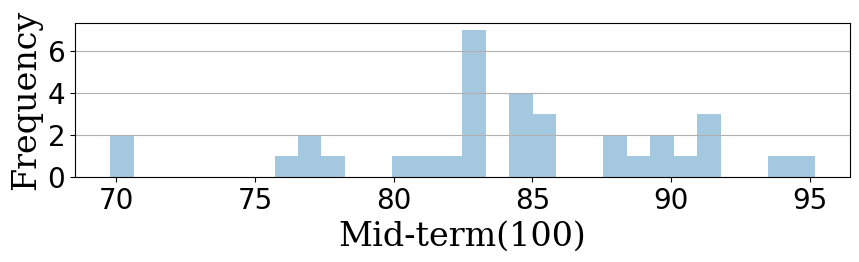

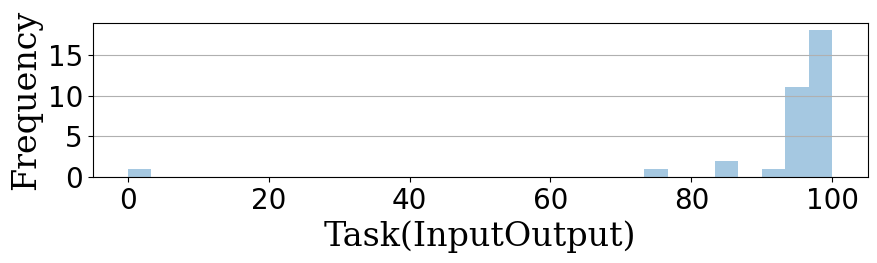

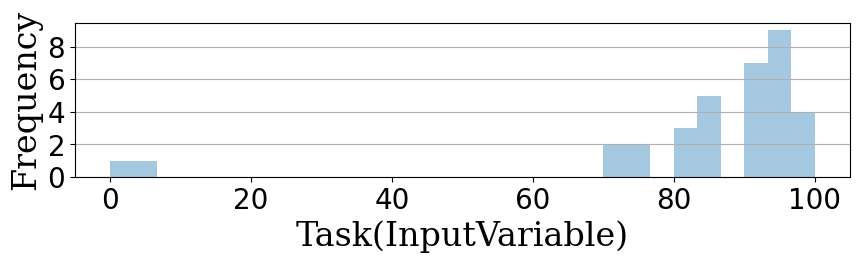

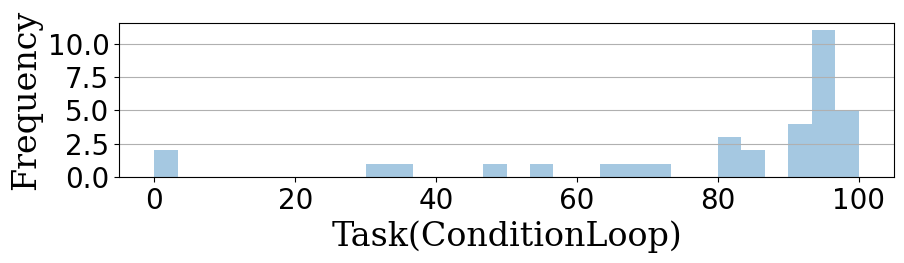

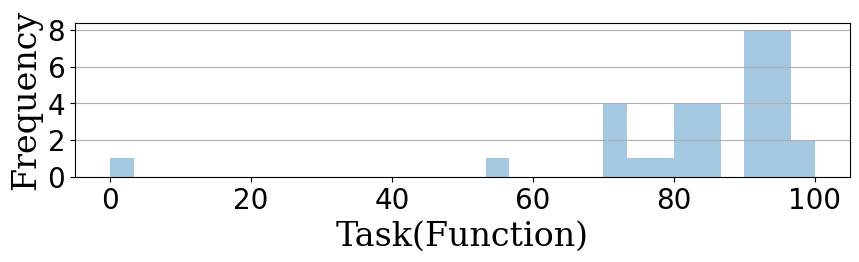

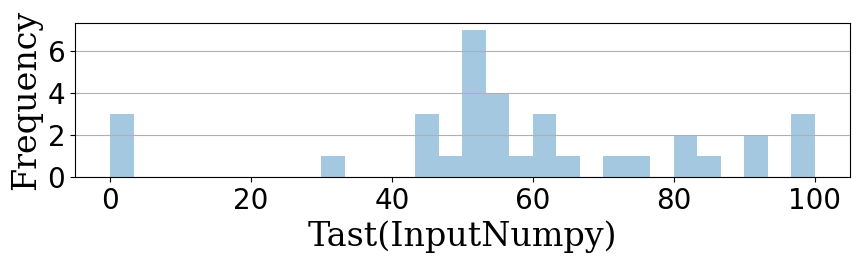

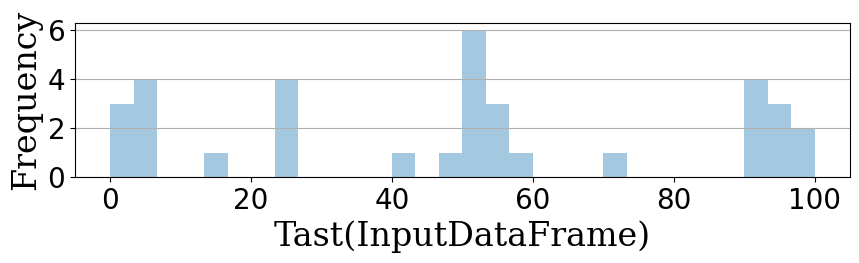

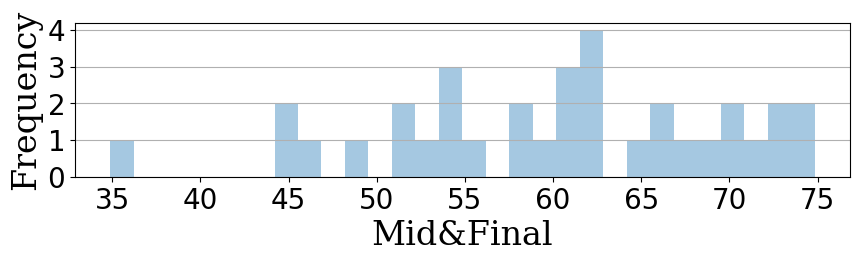

In [8]:
for col in df_dict[1].iloc[:,[8,9,10,11,12,13,14,-1]].columns:
    rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[1].iloc[:,[8,9,10,11,12,13,14,-1]][col], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(col, fontname='serif', fontsize=fontsize+4)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

In [9]:
df_temp = pd.concat([df_dict[1]['Identity'], 
                     df_dict[1].iloc[:,[8,9,10,11,12,13,14,-1]]], axis=1)                     
df_temp.sort_values(by='Mid&Final', ascending=False)

,Identity,Mid-term(100),Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Tast(InputDataFrame),Mid&Final
28,201900814,89.710611,95,100,95,90,100,100.0,74.834244
14,202100758,90.675241,100,95,95,100,100,90.0,74.570096
25,202100773,95.176849,100,80,100,90,70,97.5,73.445740
20,201501988,90.996785,95,90,100,90,90,92.5,73.323714
30,202000131,88.102894,100,95,100,95,75,95.0,71.591158
18,201800855,84.244373,95,95,85,95,90,92.5,70.372749
9,202100733,88.102894,100,90,90,95,65,95.0,69.941158
23,201800869,76.848875,100,85,95,95,100,95.0,69.039550
7,202100789,90.996785,100,99,100,95,82,52.5,68.043714
17,201700867,82.958199,100,100,90,90,60,90.0,66.683280


## 2반(Class 2) 등수짐작을 위한 분포

- 과제점수가 높은 학생들은 지속적으로 높고 낮은 학생들은 지속적으로 낮은 경향

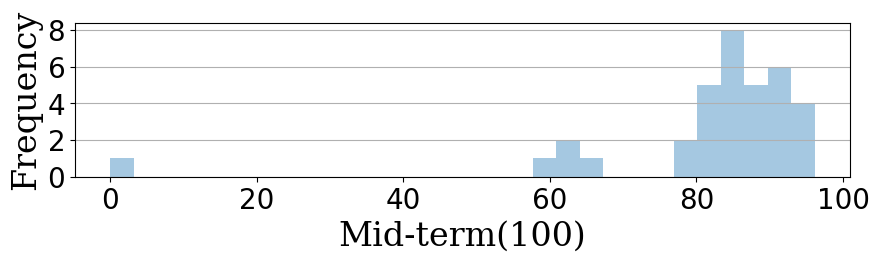

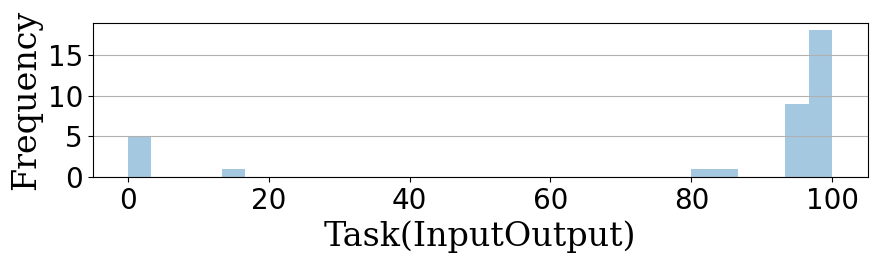

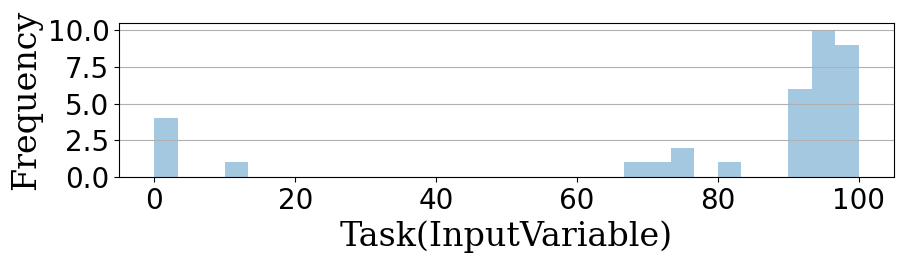

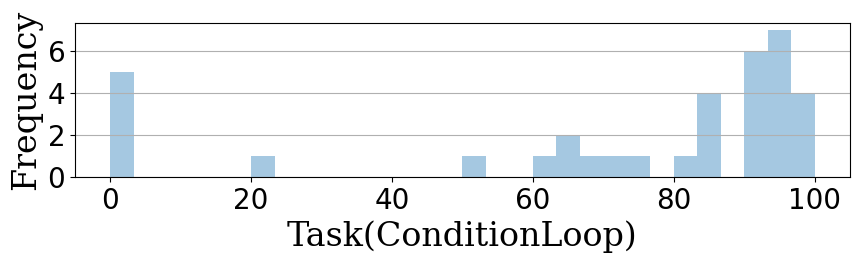

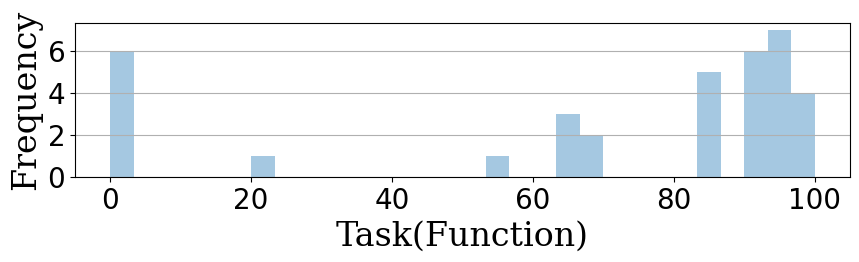

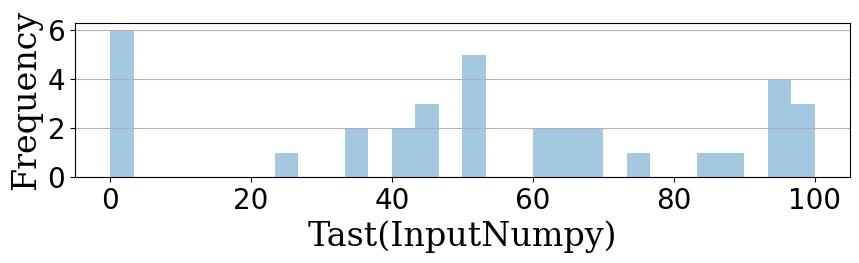

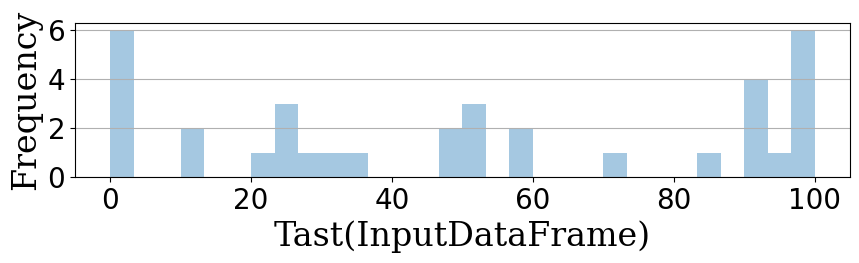

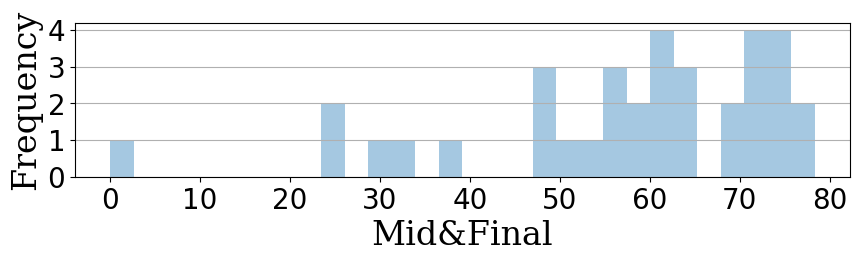

In [10]:
for col in df_dict[2].iloc[:,[8,9,10,11,12,13,14,-1]].columns:
    rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[2].iloc[:,[8,9,10,11,12,13,14,-1]][col], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(col, fontname='serif', fontsize=fontsize+4)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

In [11]:
df_temp = pd.concat([df_dict[2]['Identity'], 
                     df_dict[2].iloc[:,[8,9,10,11,12,13,14,-1]]], axis=1)                     
df_temp.sort_values(by='Mid&Final', ascending=False)

,Identity,Mid-term(100),Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Tast(InputDataFrame),Mid&Final
59,201700879,96.141479,100,99,100,100,99,100.0,78.326592
51,201800846,91.961415,100,95,90,100,99,100.0,76.034566
37,202100795,93.247588,100,100,95,95,89,100.0,75.599035
61,201800944,89.389068,100,100,100,95,95,100.0,74.905627
63,202100756,91.961415,100,95,100,95,95,90.0,74.484566
52,201902824,92.282958,95,100,95,95,85,97.5,74.388183
40,202100745,89.710611,100,100,95,95,95,85.0,72.834244
55,201700753,93.890675,95,90,85,100,65,95.0,72.256270
66,202100759,85.530547,100,100,90,90,100,90.0,71.712219
65,202100747,84.565916,100,72,85,90,95,100.0,71.036367


## 3반(Class 3) 등수짐작을 위한 분포

- 과제점수가 높은 학생들은 지속적으로 높고 낮은 학생들은 지속적으로 낮은 경향

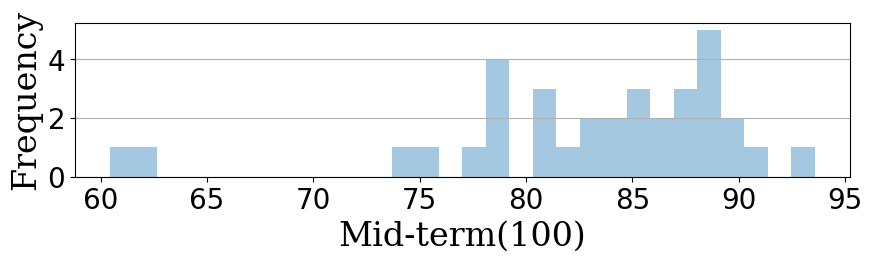

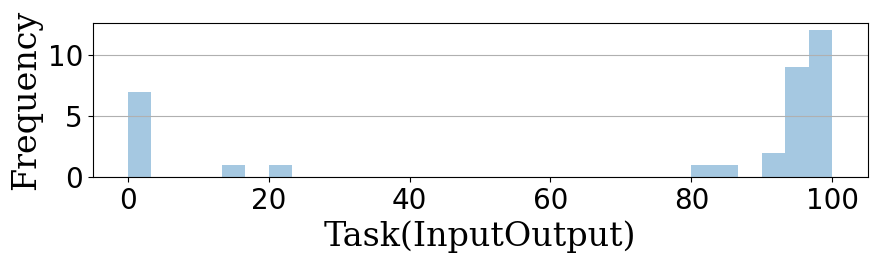

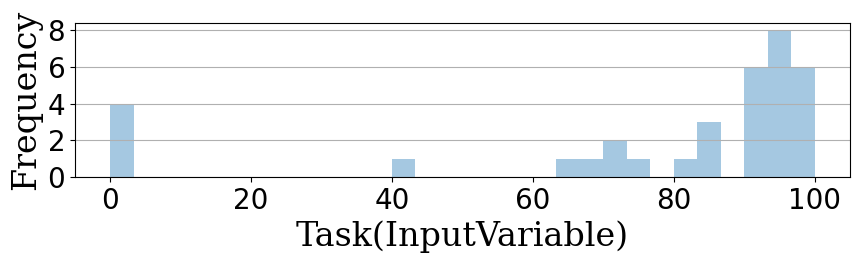

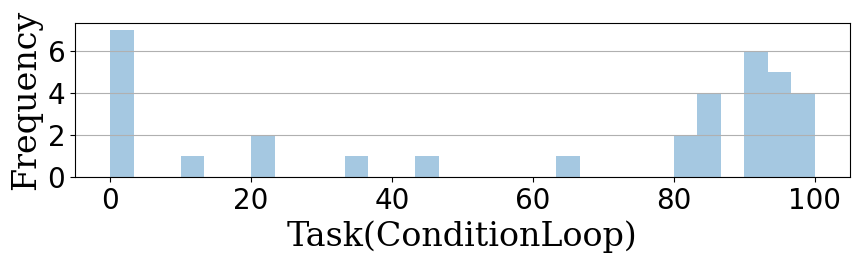

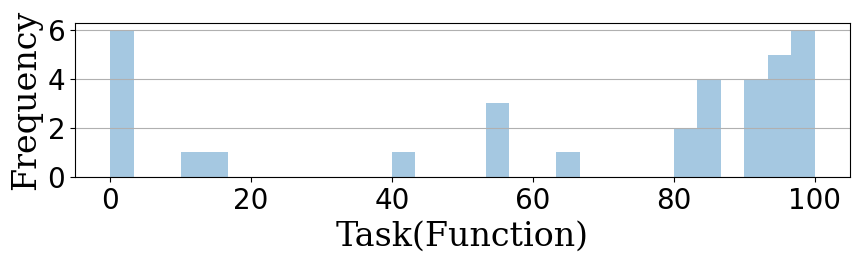

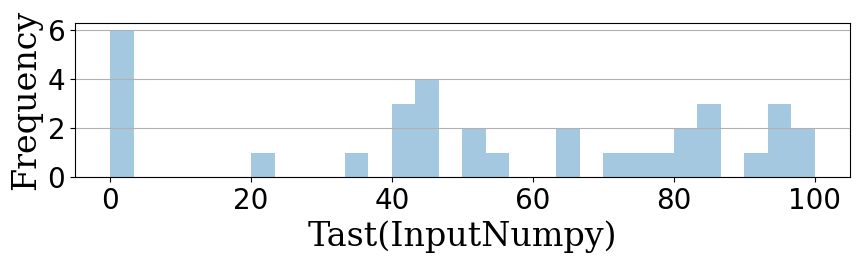

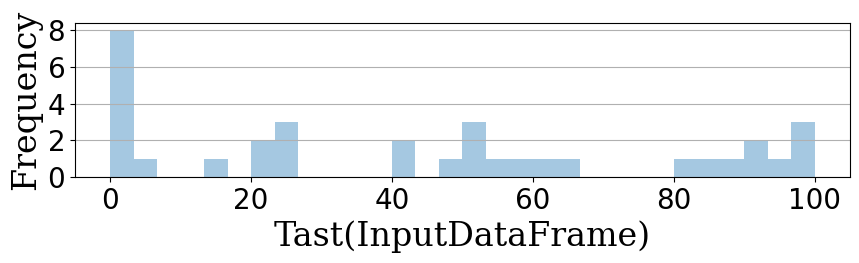

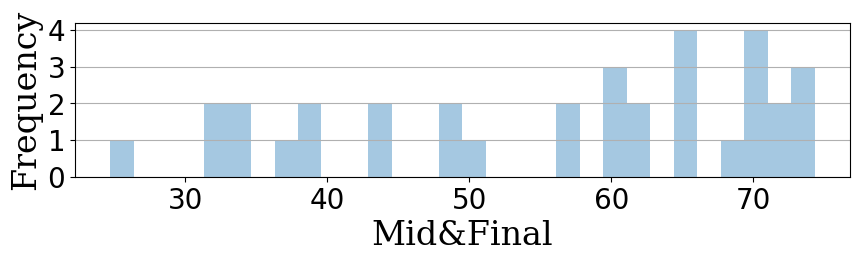

In [12]:
for col in df_dict[3].iloc[:,[8,9,10,11,12,13,14,-1]].columns:
    rcParams['figure.figsize'] = 10,2
    sns.distplot(df_dict[3].iloc[:,[8,9,10,11,12,13,14,-1]][col], bins=30, kde=False)
    plt.xticks(fontsize=fontsize, rotation=0)
    plt.yticks(fontsize=fontsize)
    plt.xlabel(col, fontname='serif', fontsize=fontsize+4)
    plt.ylabel('Frequency', fontname='serif', fontsize=fontsize+4)
    plt.grid(axis='y')
    plt.show()

In [13]:
df_temp = pd.concat([df_dict[3]['Identity'], 
                     df_dict[3].iloc[:,[8,9,10,11,12,13,14,-1]]], axis=1)                     
df_temp.sort_values(by='Mid&Final', ascending=False)

,Identity,Mid-term(100),Task(InputOutput),Task(InputVariable),Task(ConditionLoop),Task(Function),Tast(InputNumpy),Tast(InputDataFrame),Mid&Final
80,202100855,88.102894,100,95,85,100,100,100.0,74.341158
79,202100829,83.922830,100,95,100,100,95,100.0,72.919132
76,202100836,87.781350,100,100,95,100,80,100.0,72.862540
100,202100824,88.102894,100,95,64,100,95,95.0,72.141158
91,201600960,90.032154,100,90,95,95,80,90.0,71.812862
96,202100819,87.138264,100,100,95,95,70,92.5,70.280305
78,201900173,83.922830,95,100,90,90,95,85.0,69.819132
88,201600988,85.209003,100,90,90,90,85,87.5,69.458601
86,202100845,86.495177,100,90,85,100,85,80.0,69.448071
95,202100839,88.102894,100,99,80,94,100,62.5,68.916158
